In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


617

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=82a3590023f7b5920550450668242949


In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | lebork
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | los llanos de aridane
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | anori
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | pantai remis
Processing Record 13 of Set 1 | lichuan
Processing Record 14 of Set 1 | namibe
Processing Record 15 of Set 1 | sayyan
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | liku
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 22 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 23 of Set 1 | bethe

Processing Record 40 of Set 4 | cherskiy
Processing Record 41 of Set 4 | samba
Processing Record 42 of Set 4 | saint-francois
Processing Record 43 of Set 4 | sosnovo-ozerskoye
Processing Record 44 of Set 4 | savinka
Processing Record 45 of Set 4 | bucerias
Processing Record 46 of Set 4 | hamilton
Processing Record 47 of Set 4 | rawson
Processing Record 48 of Set 4 | goudomp
City not found. Skipping...
Processing Record 49 of Set 4 | bolshiye uki
City not found. Skipping...
Processing Record 50 of Set 4 | cockburn town
Processing Record 1 of Set 5 | severo-kurilsk
Processing Record 2 of Set 5 | bathsheba
Processing Record 3 of Set 5 | pahalgam
Processing Record 4 of Set 5 | mongu
Processing Record 5 of Set 5 | dudinka
Processing Record 6 of Set 5 | tabuk
Processing Record 7 of Set 5 | batticaloa
Processing Record 8 of Set 5 | mayskiy
Processing Record 9 of Set 5 | maryborough
Processing Record 10 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 5 | progres

Processing Record 29 of Set 8 | kencong
Processing Record 30 of Set 8 | cayenne
Processing Record 31 of Set 8 | bell ville
Processing Record 32 of Set 8 | maxixe
Processing Record 33 of Set 8 | nemuro
Processing Record 34 of Set 8 | chalette-sur-loing
Processing Record 35 of Set 8 | kieta
Processing Record 36 of Set 8 | hambantota
Processing Record 37 of Set 8 | kathu
Processing Record 38 of Set 8 | san rafael del sur
Processing Record 39 of Set 8 | mnogovershinnyy
Processing Record 40 of Set 8 | amderma
City not found. Skipping...
Processing Record 41 of Set 8 | bandarbeyla
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | vagur
Processing Record 44 of Set 8 | dubbo
Processing Record 45 of Set 8 | caravelas
Processing Record 46 of Set 8 | mugan
Processing Record 47 of Set 8 | buzovna
Processing Record 48 of Set 8 | khonuu
City not found. Skipping...
Processing Record 49 of Set 8 | puerto madero
Processing Record 50 of Set 8 | eenhana
Processing Record 1 of Set 9

Processing Record 16 of Set 12 | hajnowka
Processing Record 17 of Set 12 | lazaro cardenas
Processing Record 18 of Set 12 | uchiza
Processing Record 19 of Set 12 | calvini
Processing Record 20 of Set 12 | vardo
Processing Record 21 of Set 12 | jalu
Processing Record 22 of Set 12 | barbar
City not found. Skipping...
Processing Record 23 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 24 of Set 12 | pano polemidia
Processing Record 25 of Set 12 | lasa
Processing Record 26 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 27 of Set 12 | agva
City not found. Skipping...
Processing Record 28 of Set 12 | coari
Processing Record 29 of Set 12 | lata
Processing Record 30 of Set 12 | noshiro
Processing Record 31 of Set 12 | leshukonskoye
Processing Record 32 of Set 12 | opuwo
Processing Record 33 of Set 12 | sivas
Processing Record 34 of Set 12 | teguldet
Processing Record 35 of Set 12 | matagami
Processing Record 36 of Set 12 | necochea
Processing Record

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,44.76,84,45,6.80,GL,2022-07-24 15:49:24
1,Qaanaaq,77.4840,-69.3632,39.09,92,100,1.45,GL,2022-07-24 15:49:25
2,Saskylakh,71.9167,114.0833,60.22,76,99,6.51,RU,2022-07-24 15:49:25
3,Lebork,54.5392,17.7501,67.55,67,89,10.65,PL,2022-07-24 15:49:25
4,Hilo,19.7297,-155.0900,78.28,89,100,5.75,US,2022-07-24 15:49:26
5,Los Llanos De Aridane,28.6585,-17.9182,74.95,78,40,13.80,ES,2022-07-24 15:49:26
6,Kaitangata,-46.2817,169.8464,34.57,92,3,2.37,NZ,2022-07-24 15:49:26
7,Vaini,-21.2000,-175.2000,69.96,83,20,6.91,TO,2022-07-24 15:49:27
8,Ushuaia,-54.8000,-68.3000,37.02,69,0,6.91,AR,2022-07-24 15:47:09
9,Anori,-3.7728,-61.6442,93.92,36,87,3.62,BR,2022-07-24 15:49:27


In [20]:
city_data_df = city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2022-07-24 15:49:24,65.6145,-37.6368,44.76,84,45,6.80
1,Qaanaaq,GL,2022-07-24 15:49:25,77.4840,-69.3632,39.09,92,100,1.45
2,Saskylakh,RU,2022-07-24 15:49:25,71.9167,114.0833,60.22,76,99,6.51
3,Lebork,PL,2022-07-24 15:49:25,54.5392,17.7501,67.55,67,89,10.65
4,Hilo,US,2022-07-24 15:49:26,19.7297,-155.0900,78.28,89,100,5.75
5,Los Llanos De Aridane,ES,2022-07-24 15:49:26,28.6585,-17.9182,74.95,78,40,13.80
6,Kaitangata,NZ,2022-07-24 15:49:26,-46.2817,169.8464,34.57,92,3,2.37
7,Vaini,TO,2022-07-24 15:49:27,-21.2000,-175.2000,69.96,83,20,6.91
8,Ushuaia,AR,2022-07-24 15:47:09,-54.8000,-68.3000,37.02,69,0,6.91
9,Anori,BR,2022-07-24 15:49:27,-3.7728,-61.6442,93.92,36,87,3.62


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

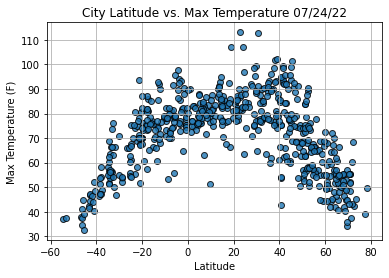

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

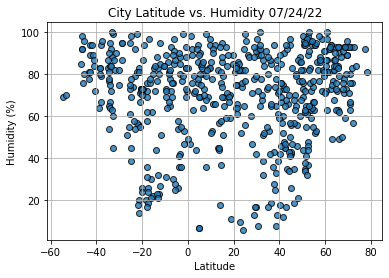

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

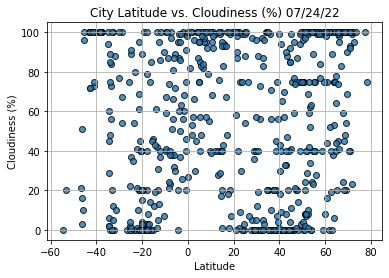

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

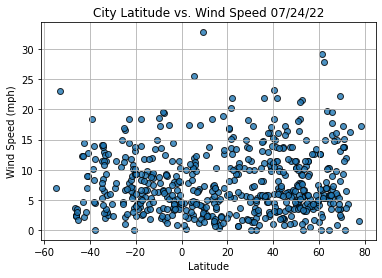

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
index13 = city_data_df.loc[13]
index13

City                       Namibe
Country                        AO
Date          2022-07-24 15:49:29
Lat                      -15.1961
Lng                       12.1522
Max Temp                    66.45
Humidity                       80
Cloudiness                     46
Wind Speed                   6.71
Name: 13, dtype: object

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2022-07-24 15:49:24,65.6145,-37.6368,44.76,84,45,6.80
1,Qaanaaq,GL,2022-07-24 15:49:25,77.4840,-69.3632,39.09,92,100,1.45
2,Saskylakh,RU,2022-07-24 15:49:25,71.9167,114.0833,60.22,76,99,6.51
3,Lebork,PL,2022-07-24 15:49:25,54.5392,17.7501,67.55,67,89,10.65
4,Hilo,US,2022-07-24 15:49:26,19.7297,-155.0900,78.28,89,100,5.75


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

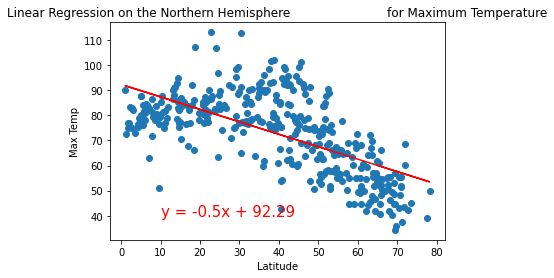

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

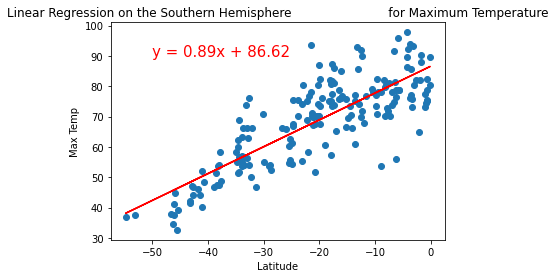

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

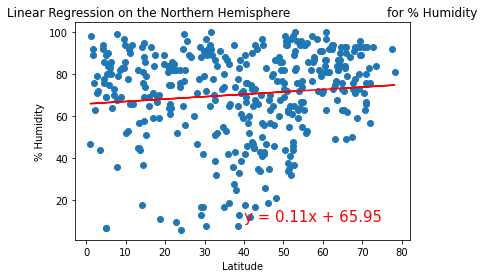

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

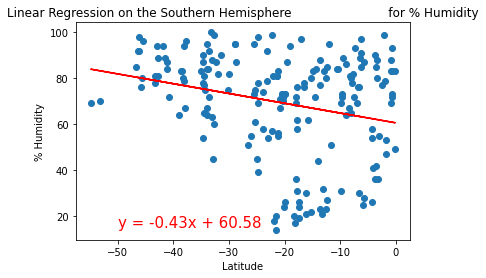

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

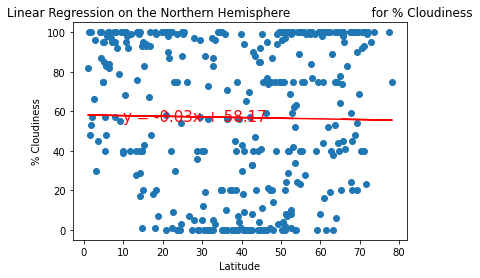

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

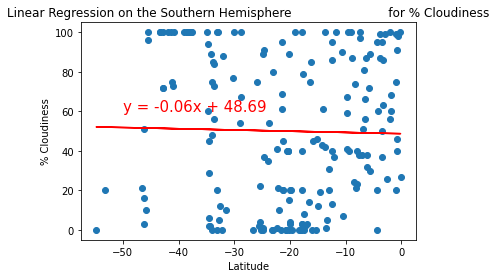

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

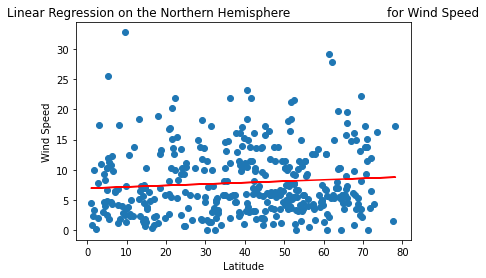

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

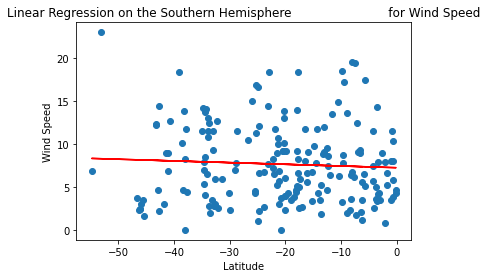

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))